In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
dataset=pd.read_csv('weatherHistory.csv')
dataset

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


## **About Dataset**

---



In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
dataset.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [5]:
dataset.describe(include='object')

,Formatted Date,Summary,Precip Type,Daily Summary
count,96453,96453,95936,96453
unique,96429,27,2,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


## **Features**

---



In [6]:
features=dataset.drop('Summary',axis=1)
features.head(5)

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## **Target**

---



In [7]:
target=dataset['Summary']
target.head(5)

0    Partly Cloudy
1    Partly Cloudy
2    Mostly Cloudy
3    Partly Cloudy
4    Mostly Cloudy
Name: Summary, dtype: object

In [8]:
type(target)
target_df=target.to_frame()
Summary_count=target_df.value_counts().reset_index()
Summary_count.columns=["Summary","Count"]
Summary_count

,Summary,Count
0,Partly Cloudy,31733
1,Mostly Cloudy,28094
2,Overcast,16597
3,Clear,10890
4,Foggy,7148
5,Breezy and Overcast,528
6,Breezy and Mostly Cloudy,516
7,Breezy and Partly Cloudy,386
8,Dry and Partly Cloudy,86
9,Windy and Partly Cloudy,67


## **Checking For NULL Values**

---



In [9]:
dataset.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [10]:
#null values only found in 'Precip Type'
dataset['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [11]:
dataset['Precip Type'][dataset['Precip Type']=='rain'].count()

85224

In [12]:
dataset['Precip Type'][dataset['Precip Type']=='snow'].count()

10712

In [13]:
#As number of null values is -% of data, it should be dealt carefully and not be dropped directly
#We will use 'Data Imputation' method here to deal with the missing values
#As'Precip Type'is a categorical variable, so lets we can't fill missing values with mean/med/mode but fill based on the assumption that adjacent observations are similar to one another.
#The ffill() method replaces the NULL values with the value from the previous row
non_null_dataset=dataset.fillna(method='ffill')
non_null_dataset

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


## **Assessing Features**

--------



In [14]:
import datetime as dt
from datetime import timedelta
typecast_date=non_null_dataset
typecast_date["Date"]=pd.to_datetime(non_null_dataset["Formatted Date"])


In [15]:
type(typecast_date['Date'][0])
datearray=typecast_date['Date'].values
datearray

array([datetime.datetime(2006, 4, 1, 0, 0, tzinfo=tzoffset(None, 7200)),
       datetime.datetime(2006, 4, 1, 1, 0, tzinfo=tzoffset(None, 7200)),
       datetime.datetime(2006, 4, 1, 2, 0, tzinfo=tzoffset(None, 7200)),
       ...,
       datetime.datetime(2016, 9, 9, 21, 0, tzinfo=tzoffset(None, 7200)),
       datetime.datetime(2016, 9, 9, 22, 0, tzinfo=tzoffset(None, 7200)),
       datetime.datetime(2016, 9, 9, 23, 0, tzinfo=tzoffset(None, 7200))],
      dtype=object)

In [16]:
import time
from datetime import datetime
#typecast_date['Month'] = typecast_date["Formatted Date"].strftime('%m')
#typecast_date['Month'] = typecast_date["Formatted Date"].str
datearrays=[]
for i in datearray:
    datearrays.append(int(i.strftime('%m')))
datearrays

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [17]:
timearrays=[]
for i in datearray:
    timearrays.append(int(i.strftime('%H')))
timearrays

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 0,
 1,
 2

In [18]:
typecast_date.insert(13, "Month", datearrays,True)
typecast_date.insert(14, "Hour", timearrays,True)

In [19]:
#typecast_date

In [20]:
#'Daily Summary' is irrelevant feature
typecast_date.drop("Daily Summary",inplace=True,axis=1)
# 'Formatted Date is replaced with Month and Hour'
typecast_date.drop("Formatted Date",axis=1,inplace=True)
typecast_date.drop("Date",axis=1,inplace=True)

## **Encoding**

---



In [21]:
encoded_data=typecast_date

In [22]:
encoded_data.select_dtypes(include = ["object"])

,Summary,Precip Type
0,Partly Cloudy,rain
1,Partly Cloudy,rain
2,Mostly Cloudy,rain
3,Partly Cloudy,rain
4,Mostly Cloudy,rain
...,...,...
96448,Partly Cloudy,rain
96449,Partly Cloudy,rain
96450,Partly Cloudy,rain
96451,Partly Cloudy,rain


In [23]:
encoded_data['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [24]:
encoded_data['Precip Type']=encoded_data['Precip Type'].replace('rain',1)
encoded_data['Precip Type']=encoded_data['Precip Type'].replace('snow',0)
encoded_data


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Month,Hour
0,Partly Cloudy,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,4,0
1,Partly Cloudy,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,4,1
2,Mostly Cloudy,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,4,2
3,Partly Cloudy,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,4,3
4,Mostly Cloudy,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,1,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,9,19
96449,Partly Cloudy,1,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,9,20
96450,Partly Cloudy,1,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,9,21
96451,Partly Cloudy,1,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,9,22


In [25]:
encoded_data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Month,Hour
0,Partly Cloudy,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,4,0
1,Partly Cloudy,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,4,1
2,Mostly Cloudy,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,4,2
3,Partly Cloudy,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,4,3
4,Mostly Cloudy,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,1,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,9,19
96449,Partly Cloudy,1,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,9,20
96450,Partly Cloudy,1,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,9,21
96451,Partly Cloudy,1,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,9,22


In [26]:
encoded_features=encoded_data.drop("Summary",axis=1)
encoded_features

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Month,Hour
0,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,4,0
1,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,4,1
2,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,4,2
3,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,4,3
4,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,4,4
...,...,...,...,...,...,...,...,...,...,...,...
96448,1,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,9,19
96449,1,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,9,20
96450,1,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,9,21
96451,1,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,9,22


*   **Reducing Dimensions**





In [27]:

# 'Loud Cover' is an insignificant feature as it contains null values only
encoded_features.drop("Loud Cover",axis=1,inplace=True)
encoded_features.drop("Apparent Temperature (C)",axis=1,inplace=True)
encoded_features

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Hour
0,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13,4,0
1,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,4,1
2,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4,2
3,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41,4,3
4,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51,4,4
...,...,...,...,...,...,...,...,...,...
96448,1,26.016667,0.43,10.9963,31.0,16.1000,1014.36,9,19
96449,1,24.583333,0.48,10.0947,20.0,15.5526,1015.16,9,20
96450,1,22.038889,0.56,8.9838,30.0,16.1000,1015.66,9,21
96451,1,21.522222,0.60,10.5294,20.0,16.1000,1015.95,9,22


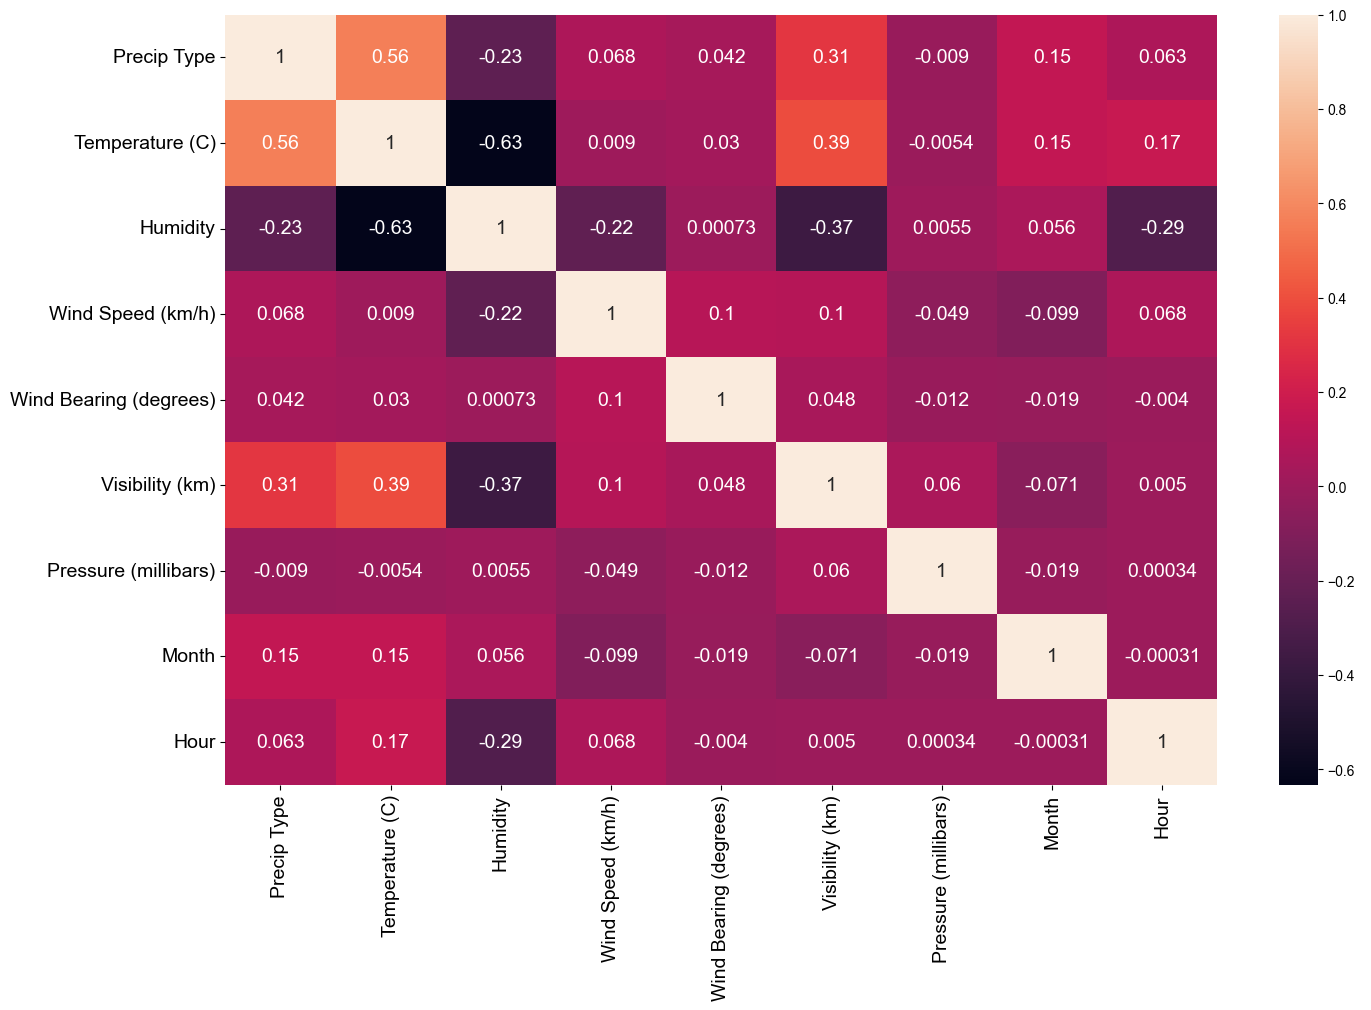

In [28]:
#Finding correlations between the features and target - graphical heatmap
plt.figure(figsize=(16,10))
sns.heatmap(encoded_features.corr(),  annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [29]:
vif = [] # empty list
vif_data = pd.DataFrame()
for i in range(encoded_features.shape[1]):
    vif.append(variance_inflation_factor(exog=encoded_features.values, exog_idx=i))
vif_data.insert(0, "Features", encoded_features.columns,True)
vif_data.insert(1, "VIF", vif,True)
vif_data

,Features,VIF
0,Precip Type,14.330426
1,Temperature (C),6.263620
2,Humidity,21.771055
3,Wind Speed (km/h),3.580207
4,Wind Bearing (degrees),4.079381
5,Visibility (km),8.721863
6,Pressure (millibars),36.885643
7,Month,4.921741
8,Hour,3.861590


In [30]:
encoded_features

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Hour
0,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13,4,0
1,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,4,1
2,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4,2
3,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41,4,3
4,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51,4,4
...,...,...,...,...,...,...,...,...,...
96448,1,26.016667,0.43,10.9963,31.0,16.1000,1014.36,9,19
96449,1,24.583333,0.48,10.0947,20.0,15.5526,1015.16,9,20
96450,1,22.038889,0.56,8.9838,30.0,16.1000,1015.66,9,21
96451,1,21.522222,0.60,10.5294,20.0,16.1000,1015.95,9,22


In [31]:
# 50-57 % accuracy
def change_category0(Summary_df):
  target_array=Summary_df['Summary'].values
  print(target_array)
  for i in target_array:
   if  i=='Breezy and Partly Cloudy' or i=='Mostly Cloudy' or i=='Partly Cloudy' or i=='Windy and Partly Cloudy' or i=='Dry and Partly Cloudy' or i=='Breezy and Mostly Cloudy' or i=='Windy and Mostly Cloudy' or i=='Dry and Mostly Cloudy':
      Summary_df['Summary']=Summary_df['Summary'].replace(i,'Cloudy')
   elif (i=='Breezy and Overcast')  or (i== 'Windy and Overcast') or i=="Overcast":
      Summary_df['Summary']=Summary_df['Summary'].replace(i,'Overcast')
   else:
      Summary_df['Summary']=Summary_df['Summary'].replace(i,'Others')

  return Summary_df

In [32]:
#50-55 accuracy
def change_category1(Summary_df):
  target_array=Summary_df['Summary'].values
  for i in target_array:
   if i=='Breezy and Overcast' or i=='Windy and Overcast' or i=='Humid and Overcast':
      Summary_df['Summary']=Summary_df['Summary'].replace(i,'Overcast')
   elif i=='Breezy and Partly Cloudy' or i=='Windy and Partly Cloudy' or i=='Dry and Partly Cloudy' or i=='Humid and Partly Cloudy' or i=='Dangerously Windy and Partly Cloudy':
      Summary_df['Summary']=Summary_df['Summary'].replace(i,'Partly Cloudy')
   elif i=='Breezy and Mostly Cloudy' or i=='Windy and Mostly Cloudy' or i=='Humid and Mostly Cloudy' or i=='Dry and Mostly Cloudy':
      Summary_df['Summary']=Summary_df['Summary'].replace(i,'Mostly Cloudy')
   elif i=='Breezy and Dry' or i=="Clear" or i=='Dry' or  i=='Windy and Dry' or i=='Windy' or i=='Breezy' or i=='Windy and Foggy' or i=='Breezy and Foggy' or i=='Light Rain' or i=='Drizzle' or i=='Rain' or i=='Foggy':
      Summary_df['Summary']=Summary_df['Summary'].replace(i,'Other')
  return Summary_df

In [33]:
def change_category2(Summary_df):
  target_array=Summary_df['Summary'].values
  print(target_array)
  for i in target_array:
   if  i=='Breezy and Partly Cloudy' or i=='Mostly Cloudy' or i=='Partly Cloudy' or i=='Windy and Partly Cloudy' or i=='Dry and Partly Cloudy' or i=='Breezy and Mostly Cloudy' or i=='Windy and Mostly Cloudy' or i=='Dry and Mostly Cloudy':
      Summary_df['Summary']=Summary_df['Summary'].replace(i,'Cloudy')
   elif i=='Light Rain' or i=='Drizzle' or i=="Rain":
      Summary_df['Summary']=Summary_df['Summary'].replace(i,'Rain')
   elif (i=='Breezy and Overcast')  or (i== 'Windy and Overcast') or i=="Overcast":
      Summary_df['Summary']=Summary_df['Summary'].replace(i,'Overcast')
   elif i=='Windy and Foggy' or i=='Breezy and Foggy' or i=="Foggy":
      Summary_df['Summary']=Summary_df['Summary'].replace(i,'Foggy')
   elif i=='Clear':
      Summary_df['Summary']=Summary_df['Summary'].replace(i,'Others')
   else:
      Summary_df['Summary']=Summary_df['Summary'].replace(i,'Others')
  return Summary_df

In [34]:
# 70-75 % accuracy
def change_category3(Summary_df):
  target_array=Summary_df['Summary'].values
  for i in target_array:
   if  i=='Clear' or i=='Breezy and Mostly Cloudy' or i=='Windy and Mostly Cloudy' or i=='Humid and Mostly Cloudy' or i=='Dry and Mostly Cloudy' or i=='Breezy and Partly Cloudy' or i=='Windy and Partly Cloudy' or i=='Dry and Partly Cloudy' or i=='Humid and Partly Cloudy' or i=='Dangerously Windy and Partly Cloudy' or i=='Breezy and Overcast' or i=='Windy and Overcast' or i=='Humid and Overcast' or i=='Breezy and Dry' or i=='Dry' or  i=='Windy and Dry' or i=='Windy' or i=='Breezy' or i=='Windy and Foggy' or i=='Breezy and Foggy' or i=='Light Rain' or i=='Drizzle' or i=='Rain' or i=='Foggy':
      Summary_df['Summary']=Summary_df['Summary'].replace(i,'Other')
  return Summary_df

In [35]:
#
def change_category4(Summary_df,features_df):
  target_array=Summary_df['Summary'].values
  for i in target_array:
    if i in ['Partly Cloudy', 'Breezy and Partly Cloudy','Dry and Partly Cloudy','Windy and Partly Cloudy','Humid and Partly Cloudy','Dangerously Windy and Partly Cloudy']:
        Summary_df['Summary']=Summary_df['Summary'].replace(i,'Partly Cloudy')
    elif i in ['Mostly Cloudy','Breezy and Mostly Cloudy','Humid and Mostly Cloudy','Windy and Mostly Cloudy ','Dry and Mostly Cloudy']:
        Summary_df['Summary']=Summary_df['Summary'].replace(i,'Mostly Cloudy')
    elif i in ['Overcast','Breezy and Overcast','Windy and Overcast','Humid and Overcast']:
        Summary_df['Summary']=Summary_df['Summary'].replace(i,'Overcast')
    else:
        Summary_df['Summary']=Summary_df['Summary'].replace(i,'Other')
  return Summary_df

In [36]:
# # oversample
# grouping_dict = {
#     'Partly Cloudy': ['Partly Cloudy', 'Breezy and Partly Cloudy','Dry and Partly Cloudy','Windy and Partly Cloudy','Humid and Partly Cloudy','Dangerously Windy and Partly Cloudy'],
#     'Mostly Cloudy': ['Mostly Cloudy','Breezy and Mostly Cloudy','Humid and Mostly Cloudy','Windy and Mostly Cloudy ','Dry and Mostly Cloudy'],
#     'Overcast': ['Overcast','Breezy and Overcast','Windy and Overcast','Humid and Overcast'],
#     'other': ['Clear','Foggy','Light Rain','Breezy','Drizzle','Breezy and Foggy','Dry','Rain','Windy','Windy and Foggy','Windy and Dry','Breezy and Dry']}

# # Create a function to map the grouped classes
# def group_classes(summary):
#     for group, classes in grouping_dict.items():
#         if summary in classes:
#             return group
#     return summary  # Return the original value if not found in any group

# # Apply the function to create the new grouped class column
# df['Summary'] = df['Summary'].apply(group_classes)

In [37]:
target_df=target.to_frame()
target_df

,Summary
0,Partly Cloudy
1,Partly Cloudy
2,Mostly Cloudy
3,Partly Cloudy
4,Mostly Cloudy
...,...
96448,Partly Cloudy
96449,Partly Cloudy
96450,Partly Cloudy
96451,Partly Cloudy


In [38]:
reduced_target4=change_category4(target_df,encoded_features)

In [39]:
reduced_target4['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Other'],
      dtype=object)

In [40]:
Summary_count=reduced_target4.value_counts().reset_index()
Summary_count.columns=["Summary","Count"]
Summary_count

,Summary,Count
0,Partly Cloudy,32290
1,Mostly Cloudy,28664
2,Other,18322
3,Overcast,17177


In [41]:
'''ind1=reduced_target[reduced_target['Summary']=='Windy and Dry'].index
reduced_target.drop(ind1,axis=0,inplace=True)
encoded_features.drop(ind1,axis=0,inplace=True)
ind2=reduced_target[reduced_target['Summary']=='Breezy and Dry'].index
reduced_target.drop(ind2,axis=0,inplace=True)
encoded_features.drop(ind2,axis=0,inplace=True)
ind3=reduced_target[reduced_target['Summary']=='Dry'].index
reduced_target.drop(ind3,axis=0,inplace=True)
encoded_features.drop(ind3,axis=0,inplace=True)
ind4=reduced_target[reduced_target['Summary']=='Windy'].index
reduced_target.drop(ind4,axis=0,inplace=True)
encoded_features.drop(ind4,axis=0,inplace=True)
ind5=reduced_target[reduced_target['Summary']=='Breezy'].index
reduced_target.drop(ind5,axis=0,inplace=True)
encoded_features.drop(ind5,axis=0,inplace=True)
ind6=reduced_target[reduced_target['Summary']=='Humid and Mostly Cloudy'].index
reduced_target.drop(ind6,axis=0,inplace=True)
encoded_features.drop(ind6,axis=0,inplace=True)
ind7=reduced_target[reduced_target['Summary']=='Humid and Partly Cloudy'].index
reduced_target.drop(ind7,axis=0,inplace=True)
encoded_features.drop(ind7,axis=0,inplace=True)
ind8=reduced_target[reduced_target['Summary']=='Humid and Overcast'].index
reduced_target.drop(ind8,axis=0,inplace=True)
encoded_features.drop(ind8,axis=0,inplace=True)
ind9=reduced_target[reduced_target['Summary']=='Dangerously Windy and Partly Cloudy'].index
reduced_target.drop(ind9,axis=0,inplace=True)
encoded_features.drop(ind9,axis=0,inplace=True)'''

"ind1=reduced_target[reduced_target['Summary']=='Windy and Dry'].index\nreduced_target.drop(ind1,axis=0,inplace=True)\nencoded_features.drop(ind1,axis=0,inplace=True)\nind2=reduced_target[reduced_target['Summary']=='Breezy and Dry'].index\nreduced_target.drop(ind2,axis=0,inplace=True)\nencoded_features.drop(ind2,axis=0,inplace=True)\nind3=reduced_target[reduced_target['Summary']=='Dry'].index\nreduced_target.drop(ind3,axis=0,inplace=True)\nencoded_features.drop(ind3,axis=0,inplace=True)\nind4=reduced_target[reduced_target['Summary']=='Windy'].index\nreduced_target.drop(ind4,axis=0,inplace=True)\nencoded_features.drop(ind4,axis=0,inplace=True)\nind5=reduced_target[reduced_target['Summary']=='Breezy'].index\nreduced_target.drop(ind5,axis=0,inplace=True)\nencoded_features.drop(ind5,axis=0,inplace=True)\nind6=reduced_target[reduced_target['Summary']=='Humid and Mostly Cloudy'].index\nreduced_target.drop(ind6,axis=0,inplace=True)\nencoded_features.drop(ind6,axis=0,inplace=True)\nind7=reduce

Counter({'Partly Cloudy': 32290, 'Mostly Cloudy': 28664, 'Other': 18322, 'Overcast': 17177})


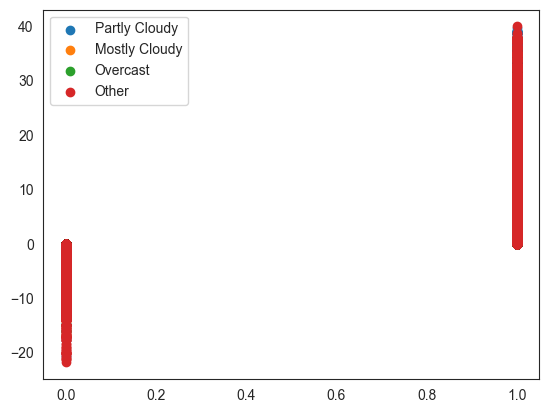

In [42]:
from collections import Counter
from matplotlib import pyplot
from numpy import where

counter = Counter(reduced_target4['Summary'].values)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(reduced_target4['Summary'].values == label)[0]
	pyplot.scatter(encoded_features.values[row_ix, 0], encoded_features.values[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [43]:
df=encoded_features
df.insert(9,"Summary",reduced_target4['Summary'].values)
df

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Hour,Summary
0,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13,4,0,Partly Cloudy
1,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,4,1,Partly Cloudy
2,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4,2,Mostly Cloudy
3,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41,4,3,Partly Cloudy
4,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51,4,4,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...
96448,1,26.016667,0.43,10.9963,31.0,16.1000,1014.36,9,19,Partly Cloudy
96449,1,24.583333,0.48,10.0947,20.0,15.5526,1015.16,9,20,Partly Cloudy
96450,1,22.038889,0.56,8.9838,30.0,16.1000,1015.66,9,21,Partly Cloudy
96451,1,21.522222,0.60,10.5294,20.0,16.1000,1015.95,9,22,Partly Cloudy


In [47]:
df.to_csv('weatherHistoryCleaned.csv',index=False)

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Hour,Summary
0,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13,4,0,Partly Cloudy
1,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,4,1,Partly Cloudy
2,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4,2,Mostly Cloudy
3,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41,4,3,Partly Cloudy
4,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51,4,4,Mostly Cloudy
...,...,...,...,...,...,...,...,...,...,...
96448,1,26.016667,0.43,10.9963,31.0,16.1000,1014.36,9,19,Partly Cloudy
96449,1,24.583333,0.48,10.0947,20.0,15.5526,1015.16,9,20,Partly Cloudy
96450,1,22.038889,0.56,8.9838,30.0,16.1000,1015.66,9,21,Partly Cloudy
96451,1,21.522222,0.60,10.5294,20.0,16.1000,1015.95,9,22,Partly Cloudy
